In [1]:
###  Task 1  ###

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

First 5 Rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Missing Values in Dataset:
review       0
sentiment    0
dtype: int64

Class Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


C:\Users\ak958\AppData\Local\Temp\ipykernel_26096\3667215118.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='viridis')


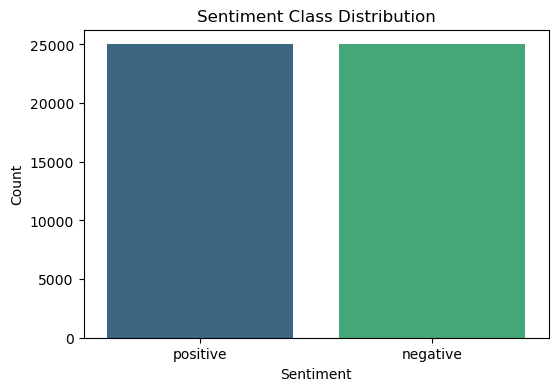


Review Length Statistics:
count    50000.000000
mean       231.146580
std        171.349956
min          1.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


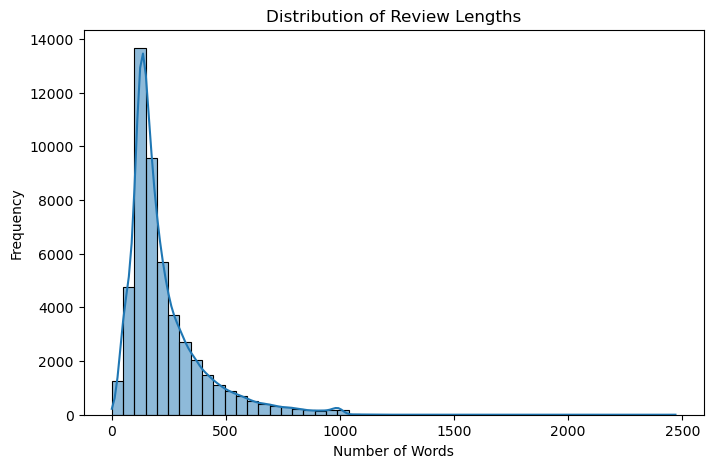

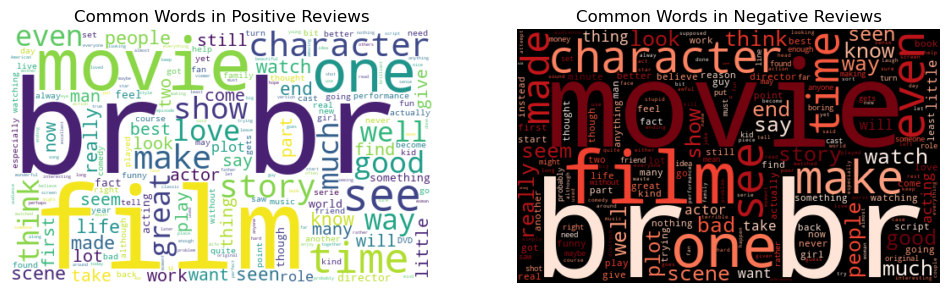

In [13]:
# 1. Analyze the dataset for trends, missing values, and outliers.

!pip install wordcloud


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset 
df = pd.read_csv("Imdb_data.csv")

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display the first few rows
print("\nFirst 5 Rows:")
print(df.head())

# ------------------------- Check for Missing Values -------------------------

# Check for missing values in each column
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# If missing values exist, drop them or handle them accordingly
df.dropna(inplace=True)  # This removes rows with missing values

# ------------------------- Check Class Distribution -------------------------

# Count the number of positive and negative reviews
print("\nClass Distribution:")
print(df['sentiment'].value_counts())

# Visualizing class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiment'], palette='viridis')
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# ------------------------- Review Length Analysis -------------------------

# Compute the length of each review (number of words)
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Display basic statistics about review length
print("\nReview Length Statistics:")
print(df['review_length'].describe())

# Plot histogram of review lengths
plt.figure(figsize=(8,5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# ------------------------- Word Cloud for Positive & Negative Reviews -------------------------

# Separate positive and negative reviews
positive_reviews = " ".join(df[df['sentiment'] == 'positive']['review'])
negative_reviews = " ".join(df[df['sentiment'] == 'negative']['review'])

# Generate word clouds for each sentiment
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
wordcloud_pos = WordCloud(width=500, height=300, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Positive Reviews")

plt.subplot(1,2,2)
wordcloud_neg = WordCloud(width=500, height=300, background_color='black', colormap='Reds').generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Negative Reviews")

plt.show()


In [ ]:
###  Task 1.2  ###

In [15]:
# Import necessary libraries
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download necessary NLTK datasets
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# 2.1 Function to clean text: Remove special characters, punctuation, and lowercase
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    return text

# Apply text cleaning to dataset
df['cleaned_review'] = df['review'].apply(clean_text)

# Display sample cleaned text
print(df[['review', 'cleaned_review']].head())


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production br br the filmin...  
2  i thought this was a wonderful way to spend ti...  
3  basically theres a family where a little boy j...  
4  petter matteis love in the time of money is a ...  


In [22]:
# 2.2 Tokenization and stopword removal

# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Function to tokenize and remove stopwords
def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)  # Tokenize text
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

# Apply tokenization & stopword removal
df['tokenized_review'] = df['cleaned_review'].apply(tokenize_and_remove_stopwords)

# Display sample tokenized text
print(df[['cleaned_review', 'tokenized_review']].head())


                                      cleaned_review  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production br br the filmin...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                    tokenized_review  
0  [one, reviewers, mentioned, watching, oz, epis...  
1  [wonderful, little, production, br, br, filmin...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, theres, family, little, boy, jake,...  
4  [petter, matteis, love, time, money, visually,...  


In [24]:
# 2.3 Lemmatization ans Stemming

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Function for lemmatization & stemming
def lemmatize_and_stem(words):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    stemmed_words = [stemmer.stem(word) for word in words]  # Stemming
    return " ".join(lemmatized_words), " ".join(stemmed_words)

# Apply lemmatization & stemming
df[['lemmatized_review', 'stemmed_review']] = df['tokenized_review'].apply(lambda x: pd.Series(lemmatize_and_stem(x)))

# Display sample processed text
print(df[['tokenized_review', 'lemmatized_review', 'stemmed_review']].head())


                                    tokenized_review  \
0  [one, reviewers, mentioned, watching, oz, epis...   
1  [wonderful, little, production, br, br, filmin...   
2  [thought, wonderful, way, spend, time, hot, su...   
3  [basically, theres, family, little, boy, jake,...   
4  [petter, matteis, love, time, money, visually,...   

                                   lemmatized_review  \
0  one reviewer mentioned watching oz episode you...   
1  wonderful little production br br filming tech...   
2  thought wonderful way spend time hot summer we...   
3  basically there family little boy jake think t...   
4  petter matteis love time money visually stunni...   

                                      stemmed_review  
0  one review mention watch oz episod youll hook ...  
1  wonder littl product br br film techniqu unass...  
2  thought wonder way spend time hot summer weeke...  
3  basic there famili littl boy jake think there ...  
4  petter mattei love time money visual stun film..

In [26]:
## 3. Convert Text into Numerical Features (Vectorization)

# 1. Bags of words (BOW)
# Initialize CountVectorizer (Bag-of-Words)
bow_vectorizer = CountVectorizer(max_features=5000)  # Limit vocabulary size
X_bow = bow_vectorizer.fit_transform(df['lemmatized_review'])

# Convert to DataFrame
bow_df = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

# Display shape and sample
print("\nBag-of-Words Feature Matrix Shape:", bow_df.shape)
print(bow_df.head())



Bag-of-Words Feature Matrix Shape: (50000, 5000)
   aaron  abandoned  abc  ability  able  aboutbr  abrupt  absence  absent  \
0      0          0    0        0     0        0       0        0       0   
1      0          0    0        0     0        0       0        0       0   
2      0          0    0        0     0        0       0        0       0   
3      0          0    0        0     0        0       0        0       0   
4      0          0    0        0     0        0       0        0       0   

   absolute  ...  youd  youll  young  younger  youre  youth  youve  zero  \
0         0  ...     0      1      0        0      0      0      0     0   
1         0  ...     0      0      0        0      0      0      0     0   
2         0  ...     0      0      1        0      0      0      0     0   
3         0  ...     0      0      0        0      1      0      0     0   
4         0  ...     0      0      0        0      0      0      0     0   

   zombie  zone  
0       0   

In [28]:
# 2. TF-IDF
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_review'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display shape and sample
print("\nTF-IDF Feature Matrix Shape:", tfidf_df.shape)
print(tfidf_df.head())



TF-IDF Feature Matrix Shape: (50000, 5000)
   aaron  abandoned  abc  ability  able  aboutbr  abrupt  absence  absent  \
0    0.0        0.0  0.0      0.0   0.0      0.0     0.0      0.0     0.0   
1    0.0        0.0  0.0      0.0   0.0      0.0     0.0      0.0     0.0   
2    0.0        0.0  0.0      0.0   0.0      0.0     0.0      0.0     0.0   
3    0.0        0.0  0.0      0.0   0.0      0.0     0.0      0.0     0.0   
4    0.0        0.0  0.0      0.0   0.0      0.0     0.0      0.0     0.0   

   absolute  ...  youd     youll     young  younger     youre  youth  youve  \
0       0.0  ...   0.0  0.057518  0.000000      0.0  0.000000    0.0    0.0   
1       0.0  ...   0.0  0.000000  0.000000      0.0  0.000000    0.0    0.0   
2       0.0  ...   0.0  0.000000  0.080129      0.0  0.000000    0.0    0.0   
3       0.0  ...   0.0  0.000000  0.000000      0.0  0.081038    0.0    0.0   
4       0.0  ...   0.0  0.000000  0.000000      0.0  0.000000    0.0    0.0   

   zero    zombie 

In [30]:
###  Task 2  ###

In [32]:
## 1. Extract Basic Textual Features

# Function to extract text-based features
def extract_text_features(text):
    word_count = len(text.split())  # Count number of words
    char_count = len(text)  # Count number of characters
    avg_word_length = char_count / word_count if word_count > 0 else 0  # Compute avg word length
    return word_count, char_count, avg_word_length

# Apply function to dataset
df[['word_count', 'char_count', 'avg_word_length']] = df['lemmatized_review'].apply(lambda x: pd.Series(extract_text_features(x)))

# Display sample results
print(df[['lemmatized_review', 'word_count', 'char_count', 'avg_word_length']].head())


                                   lemmatized_review  word_count  char_count  \
0  one reviewer mentioned watching oz episode you...       170.0      1134.0   
1  wonderful little production br br filming tech...        90.0       658.0   
2  thought wonderful way spend time hot summer we...        87.0       582.0   
3  basically there family little boy jake think t...        70.0       459.0   
4  petter matteis love time money visually stunni...       130.0       864.0   

   avg_word_length  
0         6.670588  
1         7.311111  
2         6.689655  
3         6.557143  
4         6.646154  


In [34]:
## 2. Convert Text into Numerical Features

# 2.1 TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_review'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display shape and sample
print("\nTF-IDF Feature Matrix Shape:", tfidf_df.shape)
print(tfidf_df.head())



TF-IDF Feature Matrix Shape: (50000, 5000)
   aaron  abandoned  abc  ability  able  aboutbr  abrupt  absence  absent  \
0    0.0        0.0  0.0      0.0   0.0      0.0     0.0      0.0     0.0   
1    0.0        0.0  0.0      0.0   0.0      0.0     0.0      0.0     0.0   
2    0.0        0.0  0.0      0.0   0.0      0.0     0.0      0.0     0.0   
3    0.0        0.0  0.0      0.0   0.0      0.0     0.0      0.0     0.0   
4    0.0        0.0  0.0      0.0   0.0      0.0     0.0      0.0     0.0   

   absolute  ...  youd     youll     young  younger     youre  youth  youve  \
0       0.0  ...   0.0  0.057518  0.000000      0.0  0.000000    0.0    0.0   
1       0.0  ...   0.0  0.000000  0.000000      0.0  0.000000    0.0    0.0   
2       0.0  ...   0.0  0.000000  0.080129      0.0  0.000000    0.0    0.0   
3       0.0  ...   0.0  0.000000  0.000000      0.0  0.081038    0.0    0.0   
4       0.0  ...   0.0  0.000000  0.000000      0.0  0.000000    0.0    0.0   

   zero    zombie 

In [36]:
# 2.2 Word2Vec
import numpy as np
from gensim.models import Word2Vec

# Tokenize text for Word2Vec
df['tokenized_review'] = df['lemmatized_review'].apply(lambda x: x.split())

# Train Word2Vec model
w2v_model = Word2Vec(sentences=df['tokenized_review'], vector_size=100, window=5, min_count=2, workers=4)

# Function to get averaged Word2Vec vectors for each review
def get_w2v_vector(words):
    vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

# Apply function to dataset
df['w2v_vector'] = df['tokenized_review'].apply(get_w2v_vector)

# Convert Word2Vec feature column into a DataFrame
w2v_df = pd.DataFrame(df['w2v_vector'].to_list())

# Display shape and sample
print("\nWord2Vec Feature Matrix Shape:", w2v_df.shape)
print(w2v_df.head())



Word2Vec Feature Matrix Shape: (50000, 100)
         0         1         2         3         4         5         6   \
0  0.115537 -0.223746 -0.490363  0.051949 -0.111846 -0.545319  0.242057   
1 -0.019102 -0.211138 -0.155905  0.393898  0.105459 -0.141074  0.174113   
2  0.181313 -0.390472 -0.362436 -0.002469  0.189474 -0.236005  0.174863   
3  0.154799 -0.430252 -0.258781  0.346112  0.275307 -0.404554 -0.034350   
4  0.233565 -0.402462 -0.385271  0.041877  0.334938 -0.254631  0.316026   

         7         8         9   ...        90        91        92        93  \
0  0.526228 -0.047505 -0.232694  ...  0.585636 -0.137620  0.283052  0.097940   
1  0.660985  0.271436 -0.088309  ...  0.323629 -0.355833  0.169913  0.238114   
2  0.445020  0.049587 -0.411740  ...  0.743916  0.077878  0.173707  0.258268   
3  0.605641  0.057010 -0.430835  ...  0.436730 -0.191562  0.538902  0.085007   
4  0.772344 -0.096398 -0.292962  ...  0.510750 -0.334918  0.243522  0.196099   

         94        95  

In [38]:
### Task 3 ###

In [40]:
## 1. Prepare Data for Modeling

from sklearn.model_selection import train_test_split

# Define features (using TF-IDF) and target variable
X = tfidf_df  # TF-IDF features
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # Convert labels to 0 and 1

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (40000, 5000)
Testing Set Shape: (10000, 5000)


In [42]:
## 2. Train Classification Models

# 2.1 Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8873
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [44]:
# 2.2 Naive Bayes

from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8531
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5000
           1       0.85      0.86      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
# 2.3 SVM
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


In [ ]:
# 2.4 Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


In [ ]:
## 3. Tokenization and Padding (for LSTM)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define tokenizer parameters
max_words = 10000  # Number of unique words to keep
max_len = 200  # Maximum length of sequences

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'])

# Convert text to sequences
X_seq = tokenizer.texts_to_sequences(df['review'])

# Pad sequences to ensure uniform input size
X_padded = pad_sequences(X_seq, maxlen=max_len, padding='post')

# Convert sentiment labels to binary (0 = negative, 1 = positive)
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42, stratify=y)

print("Tokenization & Padding Complete!")


In [ ]:
# Build & Train LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define LSTM model
model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_lstm = model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model_lstm.evaluate(X_test, y_test)
print(f"LSTM Test Accuracy: {test_acc:.4f}")


In [ ]:
# 4. Implement BERT for Sentiment Analysis
!pip install transformers

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Load BERT tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize text using BERT tokenizer
def encode_reviews(reviews):
    return bert_tokenizer.batch_encode_plus(
        reviews.tolist(),
        max_length=200,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )

X_train_bert = encode_reviews(df['review'][X_train.index])
X_test_bert = encode_reviews(df['review'][X_test.index])

# Convert labels to tensors
y_train_bert = tf.convert_to_tensor(y_train.values)
y_test_bert = tf.convert_to_tensor(y_test.values)

# Load pre-trained BERT model
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Compile BERT model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model_bert.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train BERT model
history_bert = model_bert.fit(
    X_train_bert['input_ids'], y_train_bert, epochs=3, batch_size=16, validation_data=(X_test_bert['input_ids'], y_test_bert)
)

# Evaluate BERT model
test_loss_bert, test_acc_bert = model_bert.evaluate(X_test_bert['input_ids'], y_test_bert)
print(f"BERT Test Accuracy: {test_acc_bert:.4f}")


In [ ]:
### Task 4 ###
'''
Task 4 was to  evaluate the model’s performance using appropriate metrics and it has already been done along with the above codes in task 3.
Evaluation is done in the same code where the models are developed and trained.
'''